# Proyecto Final

El objetivo del presente trabajo es estudiar la posibilidad de identificar/diferenciar los cultivos de trigo y cebada a través de imágenes del sensor remoto Landsat 8 (bandas 2 hasta la 7), para ello contamos con un muestreo realizado en el año 2017 en el área del partido de Coronel Suárez (clase 1 = trigo y clase 2 = cebada). Iniciamos el trabajo importando los paquetes necesarios. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importamos el archivo cvs que contiene la información correspondiente a las bandas Landsat de los pixels usados como muestra.

In [2]:
data = "https://raw.githubusercontent.com/Blassaj/Reconocimiento_patrones_sofcomputing_e_IA/main/combined_points_con_bandas.csv"
ds = pd.read_csv(data)

print(ds.shape)
print(ds.head)
print(ds.columns)

(732, 12)
<bound method NDFrame.head of      reg       X       Y        Lon  ...  band3  band4  band5  band6
0      0   706.5   827.5 -61.786329  ...    387   3090   1319    780
1      0   708.5   805.5 -61.785746  ...    236   3962   1229    560
2      1   706.5   805.5 -61.786426  ...    259   2509    970    507
3      1   707.5   827.5 -61.785989  ...    370   3095   1203    703
4      2   708.5   827.5 -61.785649  ...    360   3141   1270    728
..   ...     ...     ...        ...  ...    ...    ...    ...    ...
727  527  1034.5  1151.5 -61.673137  ...   1405   2395   3497   2883
728  528  1035.5  1151.5 -61.672797  ...   1384   2360   3450   2841
729  529  1035.5  1149.5 -61.672806  ...   1351   2308   3350   2810
730  530  1036.5  1150.5 -61.672461  ...   1378   2318   3308   2764
731  531  1036.5  1149.5 -61.672466  ...   1347   2316   3243   2772

[732 rows x 12 columns]>
Index(['reg', 'X', 'Y', 'Lon', 'Lat', 'clase', 'band1', 'band2', 'band3',
       'band4', 'band5', 'band6'

Tomamos al atributo "clase" como nuestro target de clasificación y procedemos a eliminar aquellos que no son relevantes al objeto de estudio, manteniendo los atributos correspondientes a las bandas del sensor.

In [3]:
ds2 = ds.drop(['reg','X','Y','Lon','Lat'], axis=1)
print(ds2.shape)
print(ds2.head)
print(ds2.columns)
print(ds2.describe())

(732, 7)
<bound method NDFrame.head of      clase  band1  band2  band3  band4  band5  band6
0        1    217    480    387   3090   1319    780
1        1    180    436    236   3962   1229    560
2        1    169    353    259   2509    970    507
3        1    214    474    370   3095   1203    703
4        1    208    473    360   3141   1270    728
..     ...    ...    ...    ...    ...    ...    ...
727      2    756   1062   1405   2395   3497   2883
728      2    764   1054   1384   2360   3450   2841
729      2    727   1020   1351   2308   3350   2810
730      2    733   1035   1378   2318   3308   2764
731      2    736   1009   1347   2316   3243   2772

[732 rows x 7 columns]>
Index(['clase', 'band1', 'band2', 'band3', 'band4', 'band5', 'band6'], dtype='object')
            clase       band1  ...        band5        band6
count  732.000000  732.000000  ...   732.000000   732.000000
mean     1.438525  438.464481  ...  2312.274590  1635.583333
std      0.496546  262.304154 

Visualizamos la distribución de la información en cada banda y luego respecto a cada clase de nuestro atributo target.

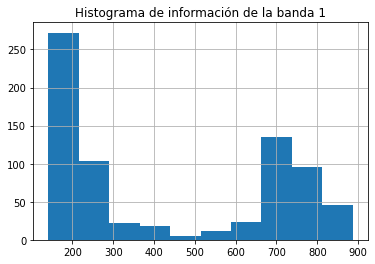

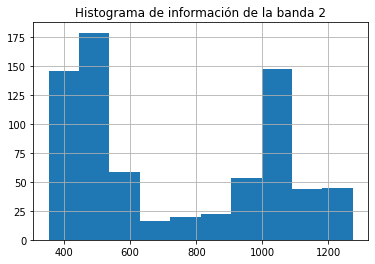

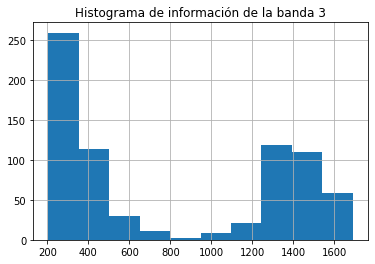

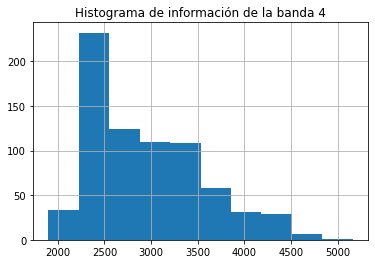

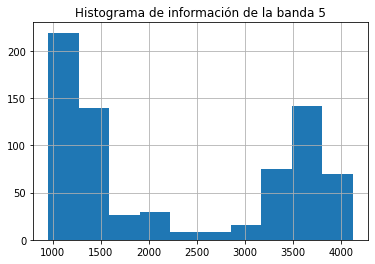

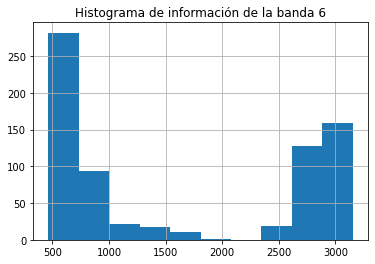

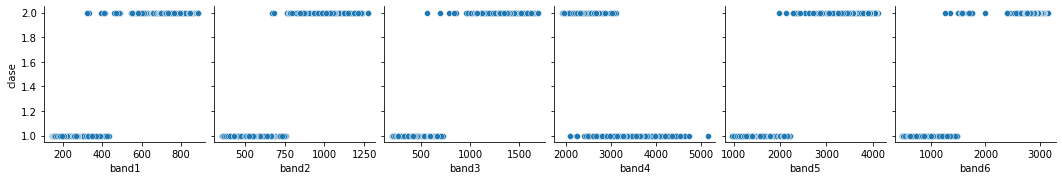

In [4]:
hist1 = ds2['band1'].hist()
plt.title('Histograma de información de la banda 1')
plt.show(hist1)

hist2 = ds2['band2'].hist()
plt.title('Histograma de información de la banda 2')
plt.show(hist2)

hist3 = ds2['band3'].hist()
plt.title('Histograma de información de la banda 3')
plt.show(hist3)

hist4 = ds2['band4'].hist()
plt.title('Histograma de información de la banda 4')
plt.show(hist4)

hist5 = ds2['band5'].hist()
plt.title('Histograma de información de la banda 5')
plt.show(hist5)

hist6 = ds2['band6'].hist()
plt.title('Histograma de información de la banda 6')
plt.show(hist6)

sns.pairplot(ds2 ,x_vars=['band1','band2','band3','band4','band5','band6'], y_vars=['clase'])

Visualizamos la información remanente del dataset a través de la matriz de correlación entre las distintas bandas y nuestro atributo target ('clase'), previa regularización de los registros.

(732, 7)
            clase       band1       band2  ...       band4       band5       band6
count  732.000000  732.000000  732.000000  ...  732.000000  732.000000  732.000000
mean     0.438525    0.398746    0.410842  ...    0.318029    0.428749    0.435533
std      0.496546    0.351614    0.316913  ...    0.186543    0.358000    0.398611
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000    0.075067    0.109663  ...    0.160304    0.093641    0.064591
50%      0.000000    0.180965    0.262215  ...    0.277062    0.211958    0.176022
75%      1.000000    0.778820    0.735342  ...    0.444419    0.819677    0.892007
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 7 columns]


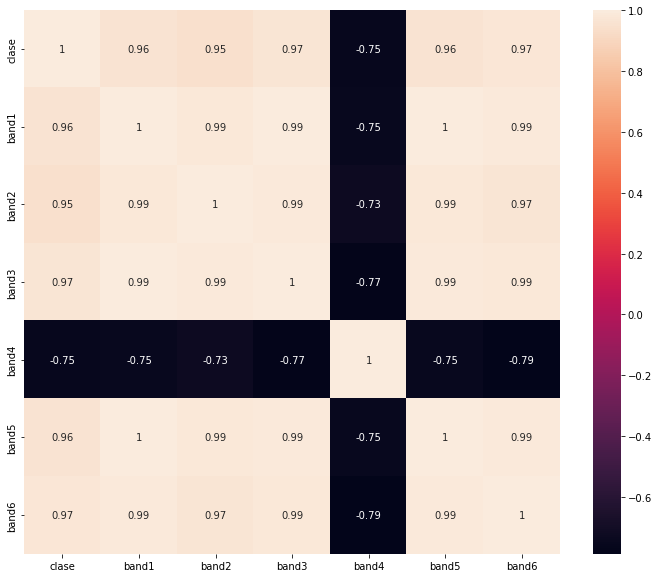

In [5]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
ds2_norm = norm.fit_transform(ds2)

ds2_norm = pd.DataFrame(ds2_norm, columns=['clase','band1','band2','band3','band4','band5','band6'])

print(ds2_norm.shape)
print(ds2_norm.describe())

fig1 = plt.figure(figsize=(12,10))
sns.heatmap(ds2_norm.corr(),annot=True)

Visualizamos medianto un gráfico 3D la distribución de los registros de las bandas que muestran una mayor correlación con nuestra variable target (band1, band3 y band6).

In [6]:
ds2_norm['clase']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
727    1.0
728    1.0
729    1.0
730    1.0
731    1.0
Name: clase, Length: 732, dtype: float64

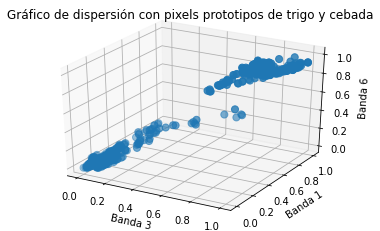

In [7]:
fig2 = plt.figure()
ax = fig2.add_subplot(projection='3d')
ax.scatter(ds2_norm['band3'], ds2_norm['band1'], ds2_norm['band6'], s=50)
ax.set_xlabel('Banda 3')
ax.set_ylabel('Banda 1')
ax.set_zlabel('Banda 6')
plt.title('Gráfico de dispersión con pixels prototipos de trigo y cebada')
plt.show(fig2)

Separamos nuestro dataset en subconjuntos de entrenamiento y muestreo.

In [8]:
from sklearn.model_selection import train_test_split

target = ds2_norm['clase']
ds2_norm = ds2_norm.drop(columns='clase')

train_ds2, test_ds2, train_tar, test_tar = train_test_split(ds2_norm, target, test_size=0.4)
print(train_ds2.shape)
print(test_ds2.shape)
print(train_tar.shape)
print(test_tar.shape)

(439, 6)
(293, 6)
(439,)
(293,)


Hacemos un anàlisis de componentes principales (PCA) para determinar la importancia de los atributos presentes sobre nuestro target.

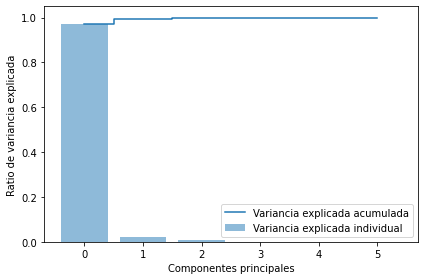

In [9]:
from sklearn.decomposition import PCA

pca = PCA(random_state=123)
ds2_pca = pca.fit_transform(train_ds2)

var_exp_pca = pca.explained_variance_ratio_
sum_acum = np.cumsum(var_exp_pca)

plt.bar(range(0,len(var_exp_pca)), var_exp_pca, alpha=0.5, align='center', label='Variancia explicada individual')
plt.step(range(0,len(sum_acum)), sum_acum, where='mid',label='Variancia explicada acumulada')
plt.ylabel('Ratio de variancia explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Implementamos un modelo de Regresión Logística para evaluar los resultados y determinar si se adapta mejor un regresor o un clasificador.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train_ds2,train_tar)

pred_logreg = logreg.predict(test_ds2)
acc_logreg = metrics.accuracy_score(test_tar,pred_logreg)
prec_logreg = metrics.precision_score(test_tar,pred_logreg)
f_mes_logreg =metrics.f1_score(test_tar,pred_logreg)

print('La exactitud del modelo fue:',acc_logreg)
print('La precisión del modelo fue:',prec_logreg)
print('El valor de f-measure fue:',f_mes_logreg)

La exactitud del modelo fue: 0.9931740614334471
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9915966386554621


Hacemos una validación cruzada para evaluar los resultados dela regresiòn logìstica respecto a distintas particiones del dataset.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(logreg, train_ds2, train_tar, scoring='accuracy', cv=cv1, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores1)))
print('La desviación standar de la exactitud es:',(np.std(scores1)))

La media de la exactitud es: 0.9931113460183228
La desviación standar de la exactitud es: 0.014795682753327615


Visualizamos los resultados de la regresión logística graficando la matriz de confusión.

[[173   0]
 [  2 118]]


Text(0.5, 257.44, 'Clase Real')

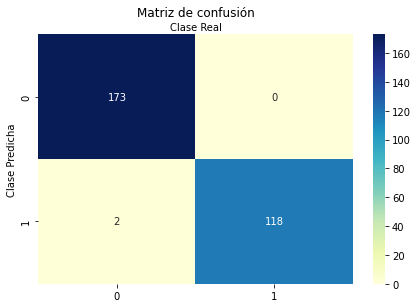

In [12]:
clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_tar,pred_logreg,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Predicha')
plt.xlabel('Clase Real')

Implementamos un clasificador K-NN como base de clasificación.

In [13]:
from sklearn import neighbors

rows, cols = ds2_norm.shape
k = int(np.sqrt(rows))
print('Valor óptimo de k supuesto como la raíz cuadrada del n total:',k,'\n')

opt_k = 0
max = 0

for x in range (1,k+1):
  knn = neighbors.KNeighborsClassifier(n_neighbors=x)
  knn.fit(train_ds2, train_tar)
  pred = knn.predict(test_ds2)
  acc = metrics.accuracy_score(test_tar,pred)
  print(acc)
  if acc > max:
    max = acc
    opt_k = x

print(opt_k)    #Viendo el resultado logrado decidimos modificar el valor óptimo de k a opt_k=10

Valor óptimo de k supuesto como la raíz cuadrada del n total: 27 

1.0
0.9965870307167235
0.9965870307167235
0.9931740614334471
0.9931740614334471
0.9931740614334471
0.9931740614334471
0.9931740614334471
0.9931740614334471
0.9931740614334471
0.9931740614334471
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9931740614334471
0.9897610921501706
0.9897610921501706
0.9897610921501706
0.9897610921501706
1


Luego de decidir un valor óptimo para k (número de vecinos a tener en cuenta) aplicamos el clasificador y evaluamos distintas métricas.

In [14]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn2.fit(train_ds2, train_tar)
pred = knn2.predict(test_ds2)

acc2 = metrics.accuracy_score(test_tar,pred)
prec = metrics.precision_score(test_tar,pred)
f_mes =metrics.f1_score(test_tar,pred)

print('La exactitud del modelo fue:',acc2)
print('La precisión del modelo fue:',prec)
print('El valor de f-measure fue:',f_mes)

La exactitud del modelo fue: 0.9931740614334471
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9915966386554621


Hacemos una validación cruzada para evaluar los resultados del modelo K-NN respecto a distintas particiones del dataset.

In [15]:
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(knn2, train_ds2, train_tar, scoring='accuracy', cv=cv2, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores2)))
print('La desviación standar de la exactitud es:',(np.std(scores2)))

La media de la exactitud es: 0.9915961945031714
La desviación standar de la exactitud es: 0.015171588469763266


Visualizamos los resultados del clasificador K-NN graficando la matriz de confusión.

[[173   0]
 [  2 118]]


Text(0.5, 257.44, 'Clase Real')

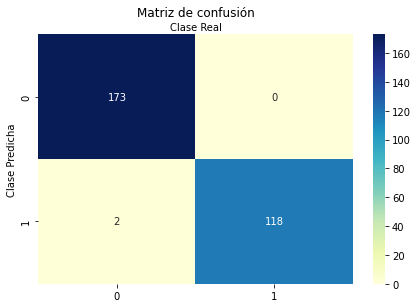

In [16]:
from sklearn.metrics import confusion_matrix

clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_tar,pred,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Predicha')
plt.xlabel('Clase Real')

Generamos un clasificador por SVM para comparar los resultados olbtenidos vs K-NN.

In [17]:
from sklearn import svm

svm = svm.SVC(kernel='rbf' , gamma='auto')
svm.fit(train_ds2, train_tar)
pred_svm = svm.predict(test_ds2)

acc_svm = metrics.accuracy_score(test_tar,pred_svm)
prec_svm = metrics.precision_score(test_tar,pred_svm)
f_mes_svm =metrics.f1_score(test_tar,pred_svm)

print('La exactitud del modelo fue:',acc_svm)
print('La precisión del modelo fue:',prec_svm)
print('El valor de f-measure fue:',f_mes_svm)   #Los resultados aplicando este clasificador son exactamente iguales al método de K-NN (en todos sus dígitos)

La exactitud del modelo fue: 0.9931740614334471
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9915966386554621


Nuevamente realizamos una validación cruzada para evaluar los resultados el modelo SVM.

In [18]:
cv3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores3 = cross_val_score(svm, train_ds2, train_tar, scoring='accuracy', cv=cv3, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores3)))
print('La desviación standar de la exactitud es:',(np.std(scores3)))

La media de la exactitud es: 0.9931113460183228
La desviación standar de la exactitud es: 0.014795682753327615


Visualizamos los resultados del clasificador SVM graficando la matriz de confusión.

[[173   0]
 [  2 118]]


Text(0.5, 257.44, 'Clase Real')

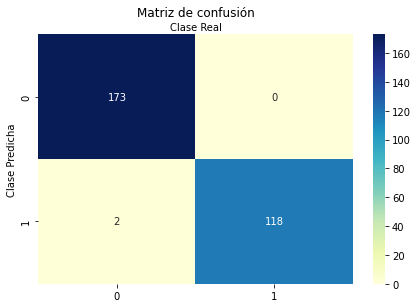

In [19]:
clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_tar,pred_svm,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Predicha')
plt.xlabel('Clase Real')

Generamos un clasificador por ETC para comparar los resultados obtenidos contra los otros modelos implementados.

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators = 10, max_depth = 2)
etc.fit(train_ds2, train_tar)
pred_etc = etc.predict(test_ds2)

acc_etc = metrics.accuracy_score(test_tar,pred_etc)
prec_etc = metrics.precision_score(test_tar,pred_etc)
f_mes_etc =metrics.f1_score(test_tar,pred_etc)

print('La exactitud del modelo fue:',acc_etc)
print('La precisión del modelo fue:',prec_etc)
print('El valor de f-measure fue:',f_mes_etc)     #Los resultados aplicando este clasificador son exactamente iguales al método de K-NN y SVM (en todos sus dígitos)

La exactitud del modelo fue: 0.9931740614334471
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9915966386554621


Visualizamos la importancia de cada banda en relación a nuestra variable target.

[0.1        0.27231645 0.20053737 0.06077632 0.12804789 0.23832198]


Text(0.5, 1.0, 'Importancia de cada banda')

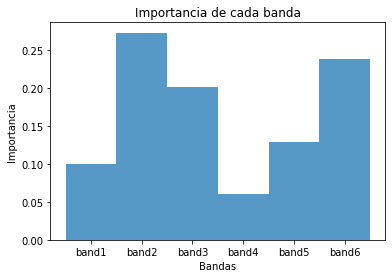

In [21]:
importances = etc.feature_importances_
print(importances)

plt.bar(ds2_norm.columns, importances, width= 1.0, alpha=0.75, align= 'center')
plt.xlabel('Bandas')
plt.ylabel('Importancia')
plt.title('Importancia de cada banda')

Visualizamos los resultados del clasificador ETC graficando la matriz de confusión.

[[173   0]
 [  2 118]]


Text(0.5, 257.44, 'Clase Real')

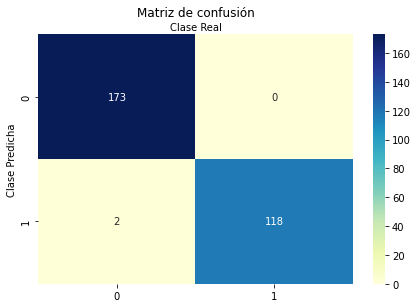

In [22]:
clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_tar,pred_etc,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Predicha')
plt.xlabel('Clase Real')

- Conclusiónes preliminares: 
  * Luego de testear los resultados de clasificación en 4 modelos distintos (1 regresor y 3 clasificadores) observamos que no hay diferencias determinantes en el desempeño de los mismos.
  * Analizando nuevamente la matriz de correlación, con nuestro dataset regularizado, vemos que la banda 1 y 5 aportan prácticamente la misma información, además de que no hay una correlación aparente de la banda 4 con nuestro atributo target.

Removemos las bandas 4 y 5 del dataset y evaluamos nuevamente un clasificador por K-NN

In [23]:
ds3_norm = ds2_norm.drop(['band4','band5'], axis=1)
print(ds3_norm.shape)
print(ds3_norm.head)

(732, 4)
<bound method NDFrame.head of         band1     band2     band3     band6
0    0.101877  0.137894  0.122559  0.117472
1    0.052279  0.090119  0.020875  0.035688
2    0.037534  0.000000  0.036364  0.015985
3    0.097855  0.131379  0.111111  0.088848
4    0.089812  0.130293  0.104377  0.098141
..        ...       ...       ...       ...
727  0.824397  0.769815  0.808081  0.899257
728  0.835121  0.761129  0.793939  0.883643
729  0.785523  0.724213  0.771717  0.872119
730  0.793566  0.740499  0.789899  0.855019
731  0.797587  0.712269  0.769024  0.857993

[732 rows x 4 columns]>


Separamos el nuevo dataset en subconjuntos de entrenamiento y muestreo.

In [24]:
train_ds3, test_ds3, train_tar, test_tar = train_test_split(ds3_norm, target, test_size=0.4)
print(train_ds3.shape)
print(test_ds3.shape)
print(train_tar.shape)
print(test_tar.shape)

(439, 4)
(293, 4)
(439,)
(293,)


Buscamos nuevamente la cantidad óptima de vecinos a utilizar en la metodología.

In [25]:
rows3, cols3 = ds3_norm.shape
k = int(np.sqrt(rows3))    #tomamos como máximo la referencia teórica de utilizar el valor correspondiente a la raíz cuadrada del n
print('Valor óptimo de k supuesto como la raíz cuadrada del n total:',k,'\n')

opt_k3 = 0
max3 = 0

for x in range (1,k+1):
  knn = neighbors.KNeighborsClassifier(n_neighbors=x)
  knn.fit(train_ds3, train_tar)
  pred3 = knn.predict(test_ds3)
  acc = metrics.accuracy_score(test_tar,pred3)
  print(acc)
  if acc > max:
    max = acc
    opt_k = x

print(opt_k)    #Tomamos un valor de k=26.

Valor óptimo de k supuesto como la raíz cuadrada del n total: 27 

0.9965870307167235
0.9965870307167235
1.0
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
0.9965870307167235
1


Implementamos el clasificador con nuestro nuevo dataset y evaluamos distintas métricas del mismo.

In [26]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors=26)
knn3.fit(train_ds3, train_tar)
pred3 = knn3.predict(test_ds3)

acc3 = metrics.accuracy_score(test_tar,pred3)
prec3 = metrics.precision_score(test_tar,pred3)
f_mes3 =metrics.f1_score(test_tar,pred3)

print('La exactitud del modelo fue:',acc3)
print('La precisión del modelo fue:',prec)
print('El valor de f-measure fue:',f_mes)   #La exactitud mejora levemente y el f-measure se mantiene exactamente igual a la evaluación con las 6 bandas.

La exactitud del modelo fue: 0.9965870307167235
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9915966386554621


Hacemos una validación cruzada para evaluar los resultados del modelo K-NN respecto a distintas particiones del dataset.

In [27]:
cv4 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores4 = cross_val_score(knn3, train_ds3, train_tar, scoring='accuracy', cv=cv4, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores4)))
print('La desviación standar de la exactitud es:',(np.std(scores4)))

La media de la exactitud es: 0.9832804792107116
La desviación standar de la exactitud es: 0.0165973633872257


Visualizamos nuevamente los resultados del clasificador graficando la matriz de confusión.

[[163   0]
 [  1 129]]


Text(0.5, 257.44, 'Clase Real')

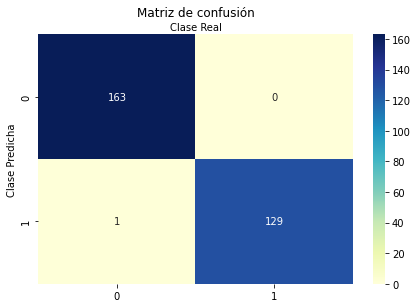

In [28]:
clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_tar,pred3,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Predicha')
plt.xlabel('Clase Real')

Por último probamos un modelo de regresión logística para comparar con el clasificador.

In [29]:
logreg2 = LogisticRegression()
logreg2.fit(train_ds3,train_tar)

pred_logreg2 = logreg2.predict(test_ds3)
acc_logreg2 = metrics.accuracy_score(test_tar,pred_logreg2)
prec_logreg2 = metrics.precision_score(test_tar,pred_logreg2)
f_mes_logreg2 =metrics.f1_score(test_tar,pred_logreg2)

print('La exactitud del modelo fue:',acc_logreg2)
print('La precisión del modelo fue:',prec_logreg2)
print('El valor de f-measure fue:',f_mes_logreg2)

La exactitud del modelo fue: 0.9965870307167235
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9961389961389961


También hacemos una validación cruzada para evaluar los resultados del modelo respecto a distintas particiones del dataset.

In [30]:
cv5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores5 = cross_val_score(logreg2, train_ds3, train_tar, scoring='accuracy', cv=cv5, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores5)))
print('La desviación standar de la exactitud es:',(np.std(scores5)))

La media de la exactitud es: 0.990891472868217
La desviación standar de la exactitud es: 0.01509179315926779


Visualizamos los resultados del regresor con la matriz de confusión.

[[163   0]
 [  1 129]]


Text(0.5, 257.44, 'Clase Real')

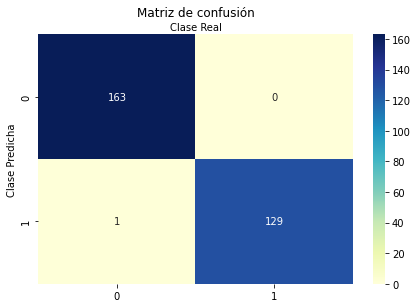

In [31]:
clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_tar,pred_logreg2,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Predicha')
plt.xlabel('Clase Real')

Conclusión fnal:
- Se observa que luego de reducir la cantidad total de features en el modelo el resultado de la predicción mejora levemente, visible en la matriz de confusión tanto del regresor como del clasificador.
- En todos los casos se presenta al menos un Falso Positivo, aumentando el número antes de practicar una reduccion de dimensionalidad.
- Independientemente de lo antes mencionado, el resultado de todos los modelos probados fue muy satisfactorio.